In [712]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


dt son fracciones de segundo


In [713]:
dt=float(1e-4)
tiempo=int(60/dt)
fuerzas=zeros(tiempo)
Kb_T=4.10
print tiempo

600000


monomeros.

In [714]:
Ntot=1000
Na=Ntot-7
Nb=7

Longitudes

In [715]:
La0=0.75
Lb0=5.7
La=La0
lp=1.7
print Na*La
print Nb*Lb0

744.75
39.9


Funciones

In [716]:
def fuerza(x,c):
    return (Kb_T/(4.0*lp))*((1.0-(x/c))**-2.0-1.0+4.0*(x/c))
def probabilidad_de_transicion(v,f,delta_X):
    return v*exp((delta_X*f)/(Kb_T))*dt
def nuevo_La(f,Numero):
    return (f/ka)+La0*Numero

7


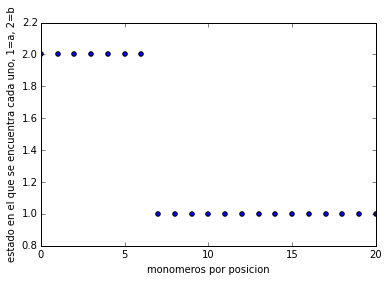

In [717]:
ka=2.0
kAB=float(5e-2)
kBA=(700.0)

delta_X_AB=0.5
delta_X_BA=-0.5

L_inicial=Na*La0+Nb*Lb0

monomeros=ones(Ntot)
cambio_L=100.0
posicion_libre=7
cp=zeros(4)
t=1

longitudes=zeros(tiempo)


for i in range(0, posicion_libre):
    monomeros[i]=2

Na=len(monomeros[monomeros==1])    
Nb=len(monomeros[monomeros==2])
NaT=zeros(tiempo)
NbT=zeros(tiempo)
tau=zeros(tiempo)
longitudA=zeros(tiempo)
longitudB=zeros(tiempo)
final=tiempo


d=linspace(0,len(monomeros[0:final]),len(monomeros[0:final]))
scatter(d,monomeros[0:final])
xlabel("monomeros por posicion")
ylabel("estado en el que se encuentra cada uno, 1=a, 2=b")
xlim(0,20)
print Nb

In [718]:
for j in range (0,tiempo):
    if (t==j):
        t=t*10
        print t
    
    
    L=L_inicial+cambio_L*(float(j)*dt)
  
    Na=len(monomeros[monomeros==1])    
    Nb=len(monomeros[monomeros==2]) 
    
    NaT[j]=Na
    NbT[j]=Nb
    tau[j]=dt*j
    

    a=La0*Na
    b=Kb_T/(lp)
    c=Lb0*Nb

    cp[0]=4*(b+c*ka)
    cp[1]=-(c)*(8*c*ka+4*ka*(L-a)+9*b)
    cp[2]=(2*c**2)*(2*c*ka+4*ka*(L-a)+3*b)
    cp[3]=4*(c**3)*(ka)*(a-L)
    yupi=roots(cp)
    Lb=yupi[2]
    
    
    if (Na==0)&(Nb==Ntot):
        c=Lb0*Ntot
        if(c==L):
            final=j
            break
        fuerzas[j]=fuerza(L,c)
    
    fuerzas[j]=fuerza(Lb,c)
    La=nuevo_La(fuerza(Lb,c),Na)
    
    longitudes[j]=L-L_inicial
    if (Na!=0):
        longitudA[j]=La/Na
    longitudB[j]=Lb/Nb
  
    p=random.uniform(size=2)
    pa=probabilidad_de_transicion(kAB,fuerzas[j],delta_X_AB)
    pb=probabilidad_de_transicion(kBA,fuerzas[j],delta_X_BA)  
        
   
    if (pa>p[1]) & ((Na)>0): 
        final=j
        monomeros[posicion_libre]=2   
        posicion_libre=posicion_libre+1
        
    Na=len(monomeros[monomeros==1])    
    Nb=len(monomeros[monomeros==2])        
        
    if (pb>p[0]) & ((Nb)>7) & (posicion_libre>7):
        posicion_libre=posicion_libre-1
        monomeros[posicion_libre]=1 
    

10
100
1000
10000
100000
1000000


/Users/juandiegoarango/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:36: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/juandiegoarango/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:41: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/juandiegoarango/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:42: ComplexWarning: Casting complex values to real discards the imaginary part


(-0.1, 20)

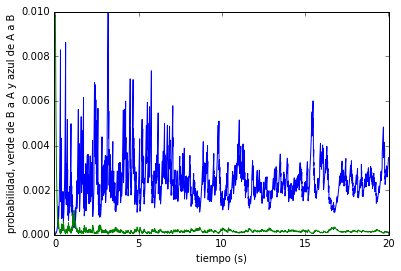

In [734]:
pa=probabilidad_de_transicion(kAB,fuerzas[0:final],delta_X_AB)
pb=probabilidad_de_transicion(kBA,fuerzas[0:final],delta_X_BA)

plot(tau[0:final],pa)
plot(tau[0:final],pb)

ylabel("probabilidad, verde de B a A y azul de A a B")
xlabel("tiempo (s)")
ylim(0,0.01)
xlim(-0.1,20)

(-100, 5000)

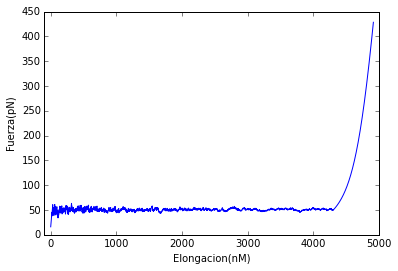

In [720]:
plot(longitudes[0:final],fuerzas[0:final])
ylabel("Fuerza(pN)")
xlabel("Elongacion(nM)")
xlim(-100,5000)

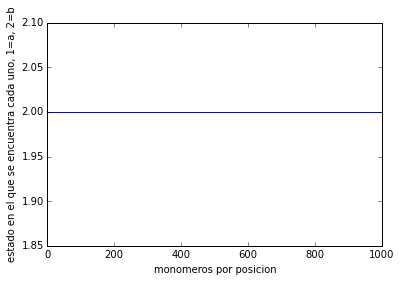

In [721]:
d=linspace(0,len(monomeros[0:final]),len(monomeros[0:final]))
plot(d,monomeros[0:final])
xlabel("monomeros por posicion")
ylabel("estado en el que se encuentra cada uno, 1=a, 2=b")


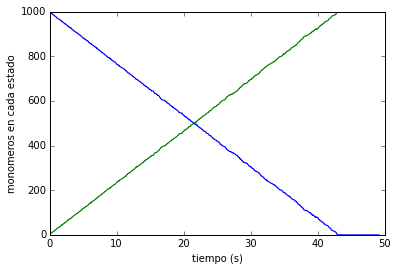

In [722]:
plot(tau[0:final],NaT[0:final])
plot(tau[0:final],NbT[0:final])
ylabel("monomeros en cada estado")
xlabel("tiempo (s)")


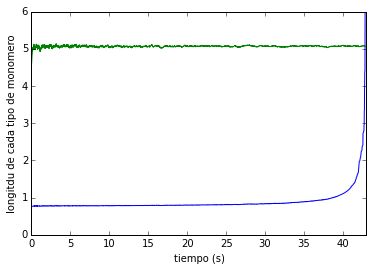

In [733]:
plot(tau[0:final],longitudA[0:final])
plot(tau[0:final],longitudB[0:final])
ylim(0,6)
xlim(0,43)
ylabel("longitdu de cada tipo de monomero")
xlabel("tiempo (s)")